In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,root_mean_squared_error,r2_score
import statsmodels.api as sm

In [2]:
df = pd.read_csv('train.csv')   
df.head()   
  

,credit_score,income,loan_amount,loan_term,interest_rate,debt_to_income_ratio,employment_years,savings_balance,age,default_risk_score
0,810,107410,11924,48,7.97,43.29,32,27181,58,7634.543366
1,418,37482,19291,24,6.94,11.01,33,15089,43,6249.833059
2,724,85641,39501,36,8.59,37.11,0,97459,33,2148.117990
3,444,73331,25714,36,13.09,33.39,18,2413,48,4979.385344
4,440,46723,35651,36,8.30,46.21,6,9716,42,2993.851950


In [3]:
df.info()   


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   credit_score          800 non-null    int64  
 1   income                800 non-null    int64  
 2   loan_amount           800 non-null    int64  
 3   loan_term             800 non-null    int64  
 4   interest_rate         800 non-null    float64
 5   debt_to_income_ratio  800 non-null    float64
 6   employment_years      800 non-null    int64  
 7   savings_balance       800 non-null    int64  
 8   age                   800 non-null    int64  
 9   default_risk_score    800 non-null    float64
dtypes: float64(3), int64(7)
memory usage: 62.6 KB


In [4]:
df.describe()

,credit_score,income,loan_amount,loan_term,interest_rate,debt_to_income_ratio,employment_years,savings_balance,age,default_risk_score
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,565.405000,85779.287500,27795.651250,36.315000,8.732238,29.812500,16.376250,48850.921250,42.443750,4529.968687
std,159.528109,37972.705711,12819.525021,17.163012,3.670453,11.626346,10.036339,29785.455545,15.011446,2567.048232
min,300.000000,20060.000000,5097.000000,12.000000,2.510000,10.000000,0.000000,28.000000,18.000000,49.757940
25%,426.750000,53056.250000,16136.000000,24.000000,5.537500,19.925000,8.000000,21359.750000,29.000000,2377.592064
50%,553.000000,85105.000000,28518.500000,36.000000,8.725000,29.645000,16.000000,47314.500000,42.000000,4379.666025
75%,702.000000,118776.000000,38539.750000,48.000000,11.915000,40.005000,25.000000,76191.000000,55.250000,6821.026905
max,849.000000,149972.000000,49976.000000,60.000000,14.990000,49.910000,34.000000,99976.000000,69.000000,9113.843128


In [5]:
df.isnull().sum()   

credit_score            0
income                  0
loan_amount             0
loan_term               0
interest_rate           0
debt_to_income_ratio    0
employment_years        0
savings_balance         0
age                     0
default_risk_score      0
dtype: int64

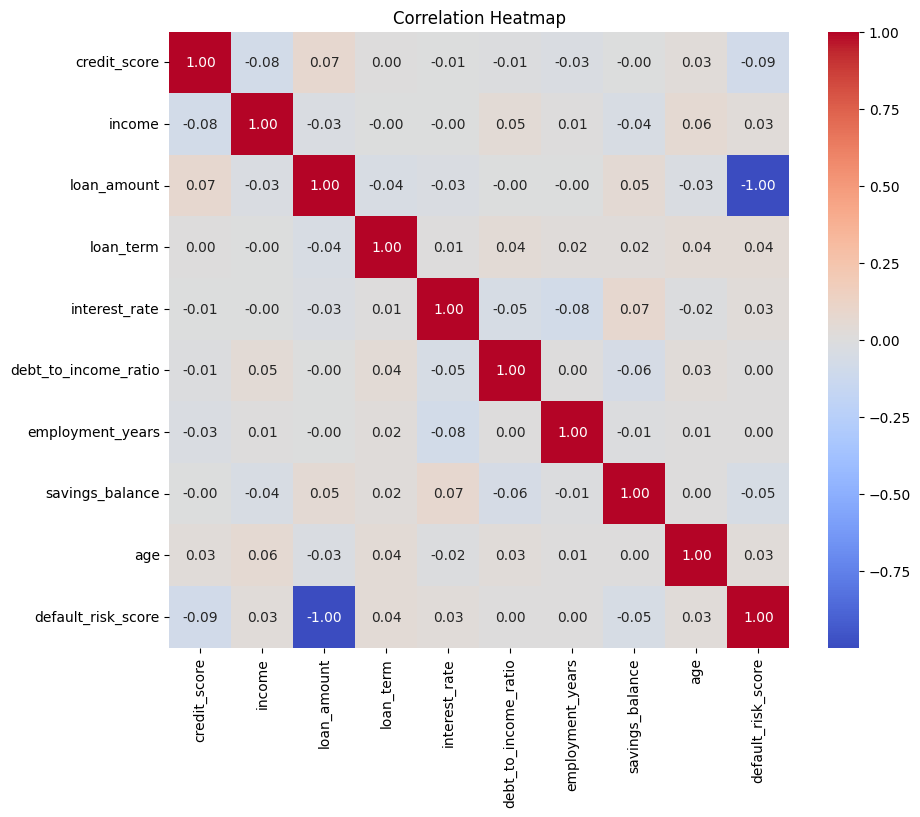

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

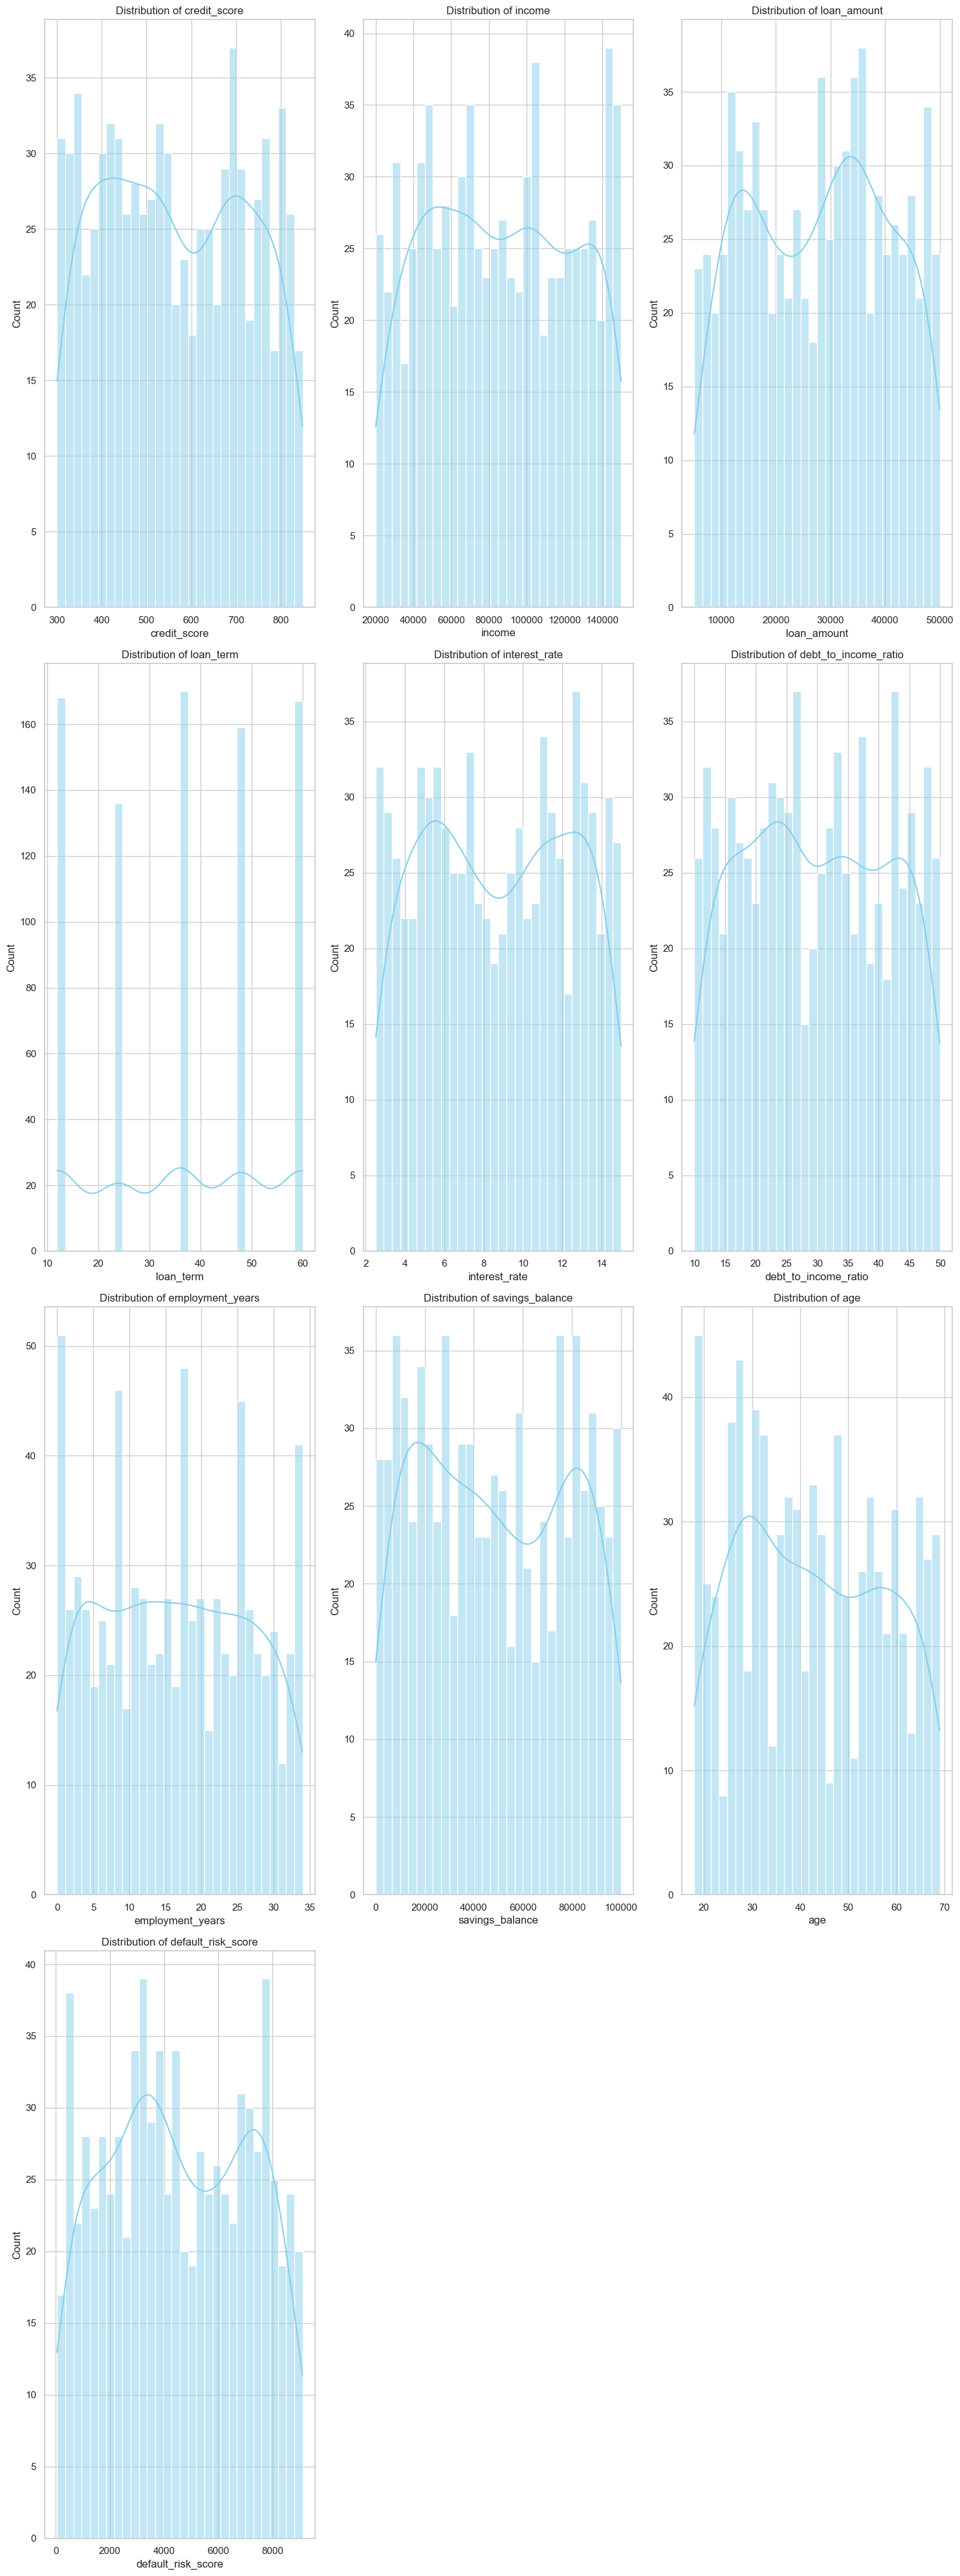

In [8]:
sns.set(style="whitegrid")

# Determine the number of features
num_features = len(df.columns)
num_rows = (num_features // 3) + 1

# Plot distribution for each feature
plt.figure(figsize=(15, num_rows * 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(df[column], bins=30, kde=True, color="skyblue")
    plt.title(f"Distribution of {column}")
    plt.tight_layout()

plt.show()

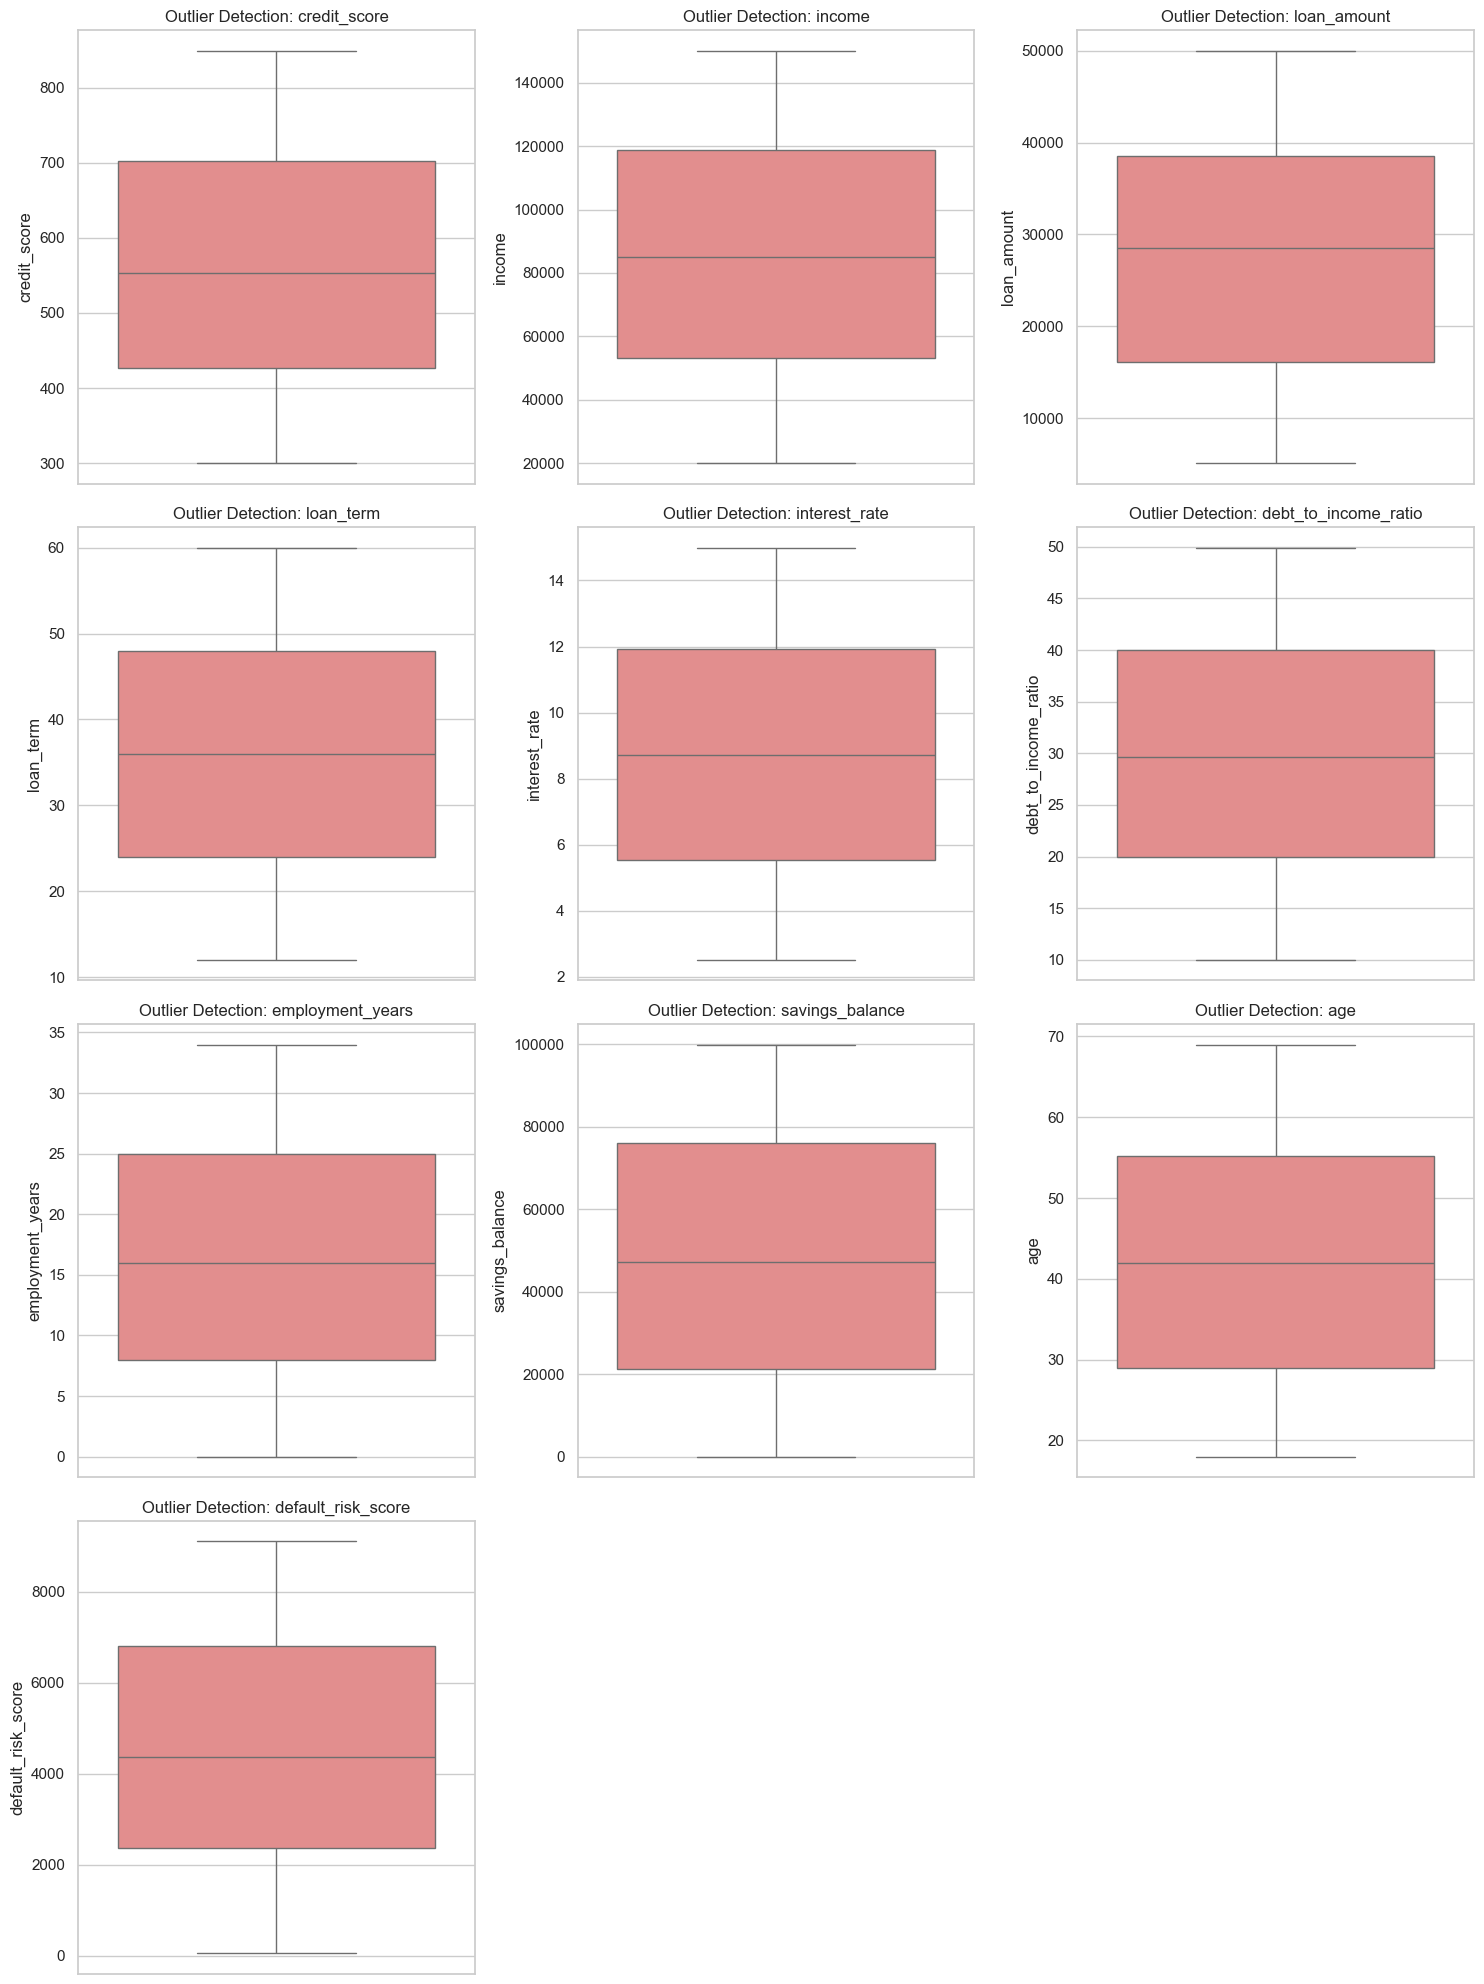

In [9]:
sns.set(style="whitegrid")

# Determine the number of features
num_features = len(df.columns)
num_rows = (num_features // 3) + 1

# Plot boxplots for outlier detection
plt.figure(figsize=(15, num_rows * 5))
for i, column in enumerate(df.columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(y=df[column], color="lightcoral")
    plt.title(f"Outlier Detection: {column}")
    plt.tight_layout()

plt.show()

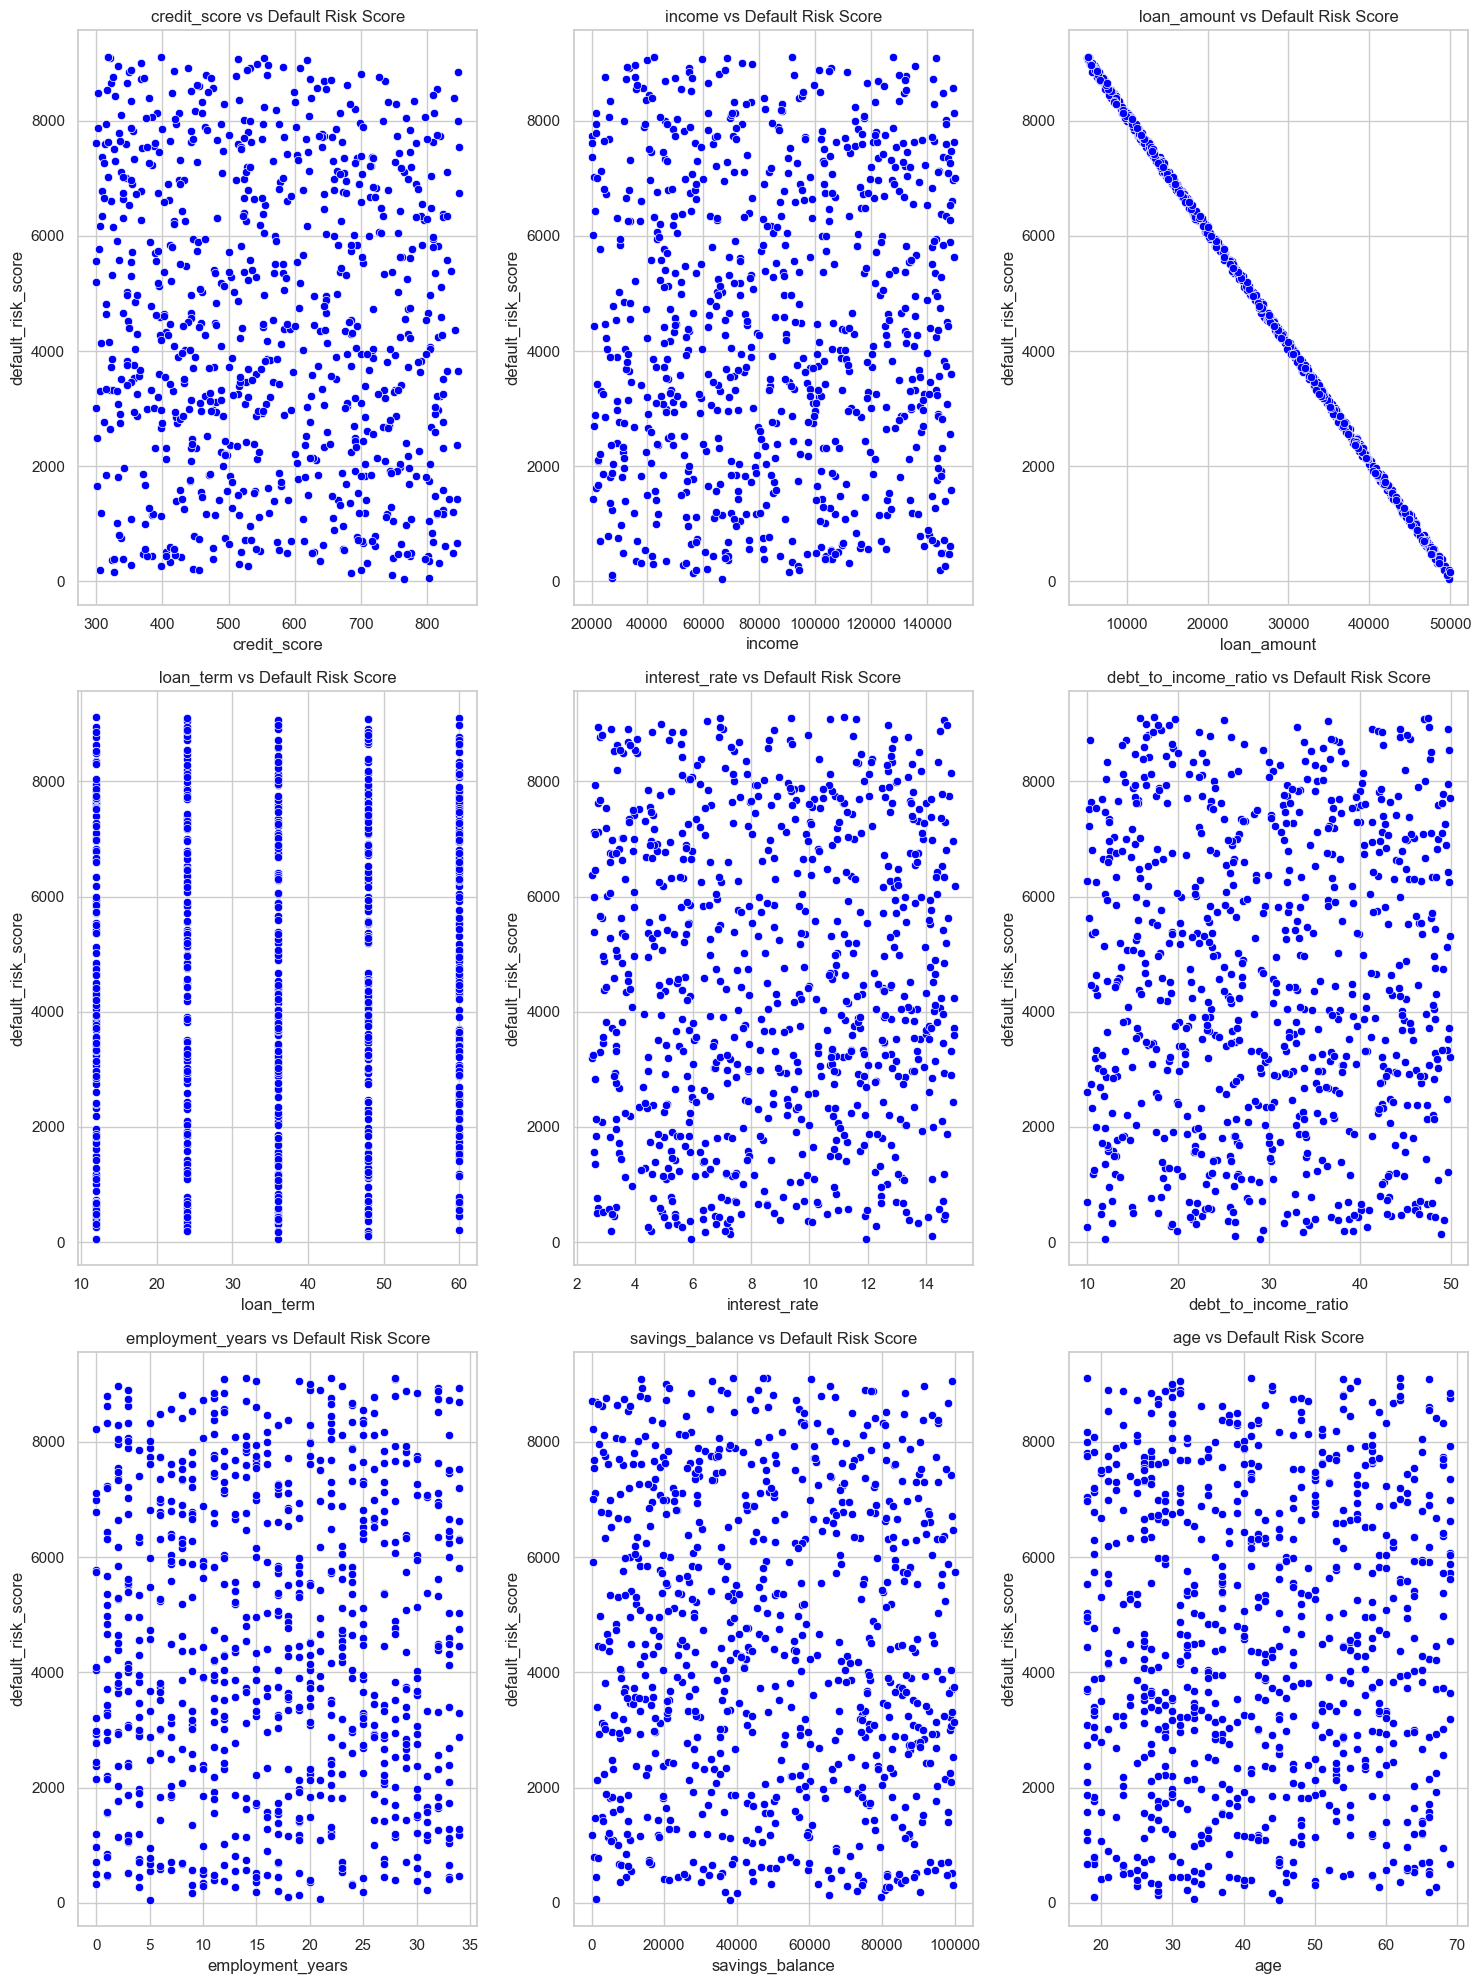

In [10]:
features = ['credit_score', 'income', 'loan_amount', 'loan_term', 
            'interest_rate', 'debt_to_income_ratio', 'employment_years', 
            'savings_balance', 'age']

plt.figure(figsize=(15, 20))

for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=df[feature], y=df['default_risk_score'], color='blue')
    plt.title(f'{feature} vs Default Risk Score')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [28]:
# Define features and target variable
X = df.drop('default_risk_score', axis=1)
y = df['default_risk_score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Add a constant to the model
X_train_sm = sm.add_constant(X_train)

# Fit the OLS model
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Summary of the model
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:     default_risk_score   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     129.1
Date:                Tue, 18 Mar 2025   Prob (F-statistic):          1.09e-136
Time:                        21:46:29   Log-Likelihood:                -505.46
No. Observations:                 640   AIC:                             1031.
Df Residuals:                     630   BIC:                             1076.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.3457 

In [30]:
from sklearn.linear_model import Lasso
# Fit Lasso model
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)

# Get feature importance
feature_importance = pd.Series(lasso.coef_, index=X.columns)
feature_importance.sort_values(ascending=False)


loan_term               4.047850e-02
interest_rate           3.139955e-02
income                  5.265945e-07
credit_score           -0.000000e+00
debt_to_income_ratio   -0.000000e+00
savings_balance         0.000000e+00
employment_years       -0.000000e+00
age                     0.000000e+00
loan_amount            -1.191389e+00
dtype: float64

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Adding a constant for intercept
import statsmodels.api as sm
X = sm.add_constant(X)
# calculating VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif_data

,Feature,VIF
0,const,820.580188
1,credit_score,1.014494
2,income,1.015872
3,loan_amount,1.009912
4,loan_term,1.005532
5,interest_rate,1.015067
6,debt_to_income_ratio,1.007677
7,employment_years,1.007995
8,savings_balance,1.013559
9,age,1.008109


In [32]:
# Scaling variables
scaled_columns = ['loan_term','interest_rate', 'debt_to_income_ratio','employment_years','age']
scaler = StandardScaler()
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])
df.head()

,credit_score,income,loan_amount,loan_term,interest_rate,debt_to_income_ratio,employment_years,savings_balance,age,default_risk_score
0,6.698268,107410,9.386392,0.681250,-0.207798,1.159946,1.557692,10.210310,1.036941,8.940569
1,6.037871,37482,9.867446,-0.717980,-0.488593,-1.618244,1.657392,9.621788,0.037078,8.740470
2,6.586172,85641,10.584107,-0.018365,-0.038776,0.628062,-1.632716,11.487197,-0.629497,7.672813
3,6.098074,73331,10.154830,-0.018365,1.187997,0.307899,0.161888,7.789040,0.370366,8.513263
4,6.089045,46723,10.481561,-0.018365,-0.117835,1.411257,-1.034515,9.181632,-0.029579,8.004650


In [63]:
# log transformation
log_columns = ['credit_score', 'loan_amount','savings_balance','default_risk_score']
df[log_columns] = df[log_columns].apply(lambda x:np.log1p(x))
df.head()

,credit_score,income,loan_amount,loan_term,interest_rate,debt_to_income_ratio,employment_years,savings_balance,age,default_risk_score
0,1.112185,107410,1.206119,0.681250,-0.207798,1.159946,1.557692,1.228714,1.036941,1.192899
1,1.082248,37482,1.219582,-0.717980,-0.488593,-1.618244,1.657392,1.212806,0.037078,1.186711
2,1.107350,85641,1.238268,-0.018365,-0.038776,0.628062,-1.632716,1.259796,-0.629497,1.150633
3,1.085130,73331,1.227261,-0.018365,1.187997,0.307899,0.161888,1.154837,0.370366,1.179481
4,1.084699,46723,1.235687,-0.018365,-0.117835,1.411257,-1.034515,1.200141,-0.029579,1.162445


In [64]:
# feature selection using RFE
from sklearn.feature_selection import RFE
# fit regression model
lr = LinearRegression()
# select top 5 features using RFE
rfe = RFE(estimator = lr, n_features_to_select = 6)
X_selected_rfe = rfe.fit_transform(X,y)
# get selected feature names
selected_features = X.columns[rfe.support_]
print(f"Selected_features : {selected_features}")

Selected_features : Index(['credit_score', 'loan_amount', 'loan_term', 'interest_rate',
       'savings_balance'],
      dtype='object')


C:\Users\HomePC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\feature_selection\_rfe.py:300: UserWarning: Found n_features_to_select=6 > n_features=5. There will be no feature selection and all features will be kept.
  warnings.warn(


In [65]:
# Ridge regression
from sklearn.linear_model import Ridge

X = df[selected_features]

# define range for parameter tuning
param_grid = {'alpha':[0.001,0.01,0.1,1,10,100,1000]}
# grid search to find best alpha
ridge_cv = GridSearchCV(Ridge(),param_grid,scoring = 'r2', cv = 6)
ridge_cv.fit(X_train,y_train)
# Get the best alpha value
best_alpha = ridge_cv.best_params_['alpha']
print(f"Best alpha : {best_alpha}")

# fit ridge model using the best alpha
ridge = Ridge(alpha = best_alpha)
ridge.fit(X_train, y_train)

Best alpha : 0.01


Ridge(alpha=0.01)

In [66]:
# make predictions
y_pred_ridge = ridge.predict(X_test)

In [67]:
# Evaluate model performance
ridge_mse = mean_squared_error(y_test,y_pred_ridge)
ridge_r2 = r2_score(y_test,y_pred_ridge)
print(f"MSE : {ridge_mse}")
print(f"R squared : {ridge_r2}")

MSE : 0.24011007326465209
R squared : 0.6022204218471932


In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor        

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    'xgboost': XGBRegressor()   
}

In [69]:
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    trained_models[name] = model  # Store trained model

In [61]:
#Fit models and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} - R²: {r2_score(y_test, y_pred)}, MSE: {mean_squared_error(y_test, y_pred)}, MAE: {mean_absolute_error(y_test, y_pred)}")

Linear Regression - R²: 0.6007583088431788, MSE: 0.24099264260656086, MAE: 0.39525343440095634
Random Forest - R²: 0.9983898871218351, MSE: 0.0009719059056169486, MAE: 0.015134204129894063
xgboost - R²: 0.9971955193959229, MSE: 0.001692857251348346, MAE: 0.016652307643295717


In [62]:
import joblib

# Save the model
joblib.dump(model, 'Random Forest.pkl')

['Random Forest.pkl']